In [246]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize 
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
nltk.download('wordnet')
from sklearn.decomposition import LatentDirichletAllocation as LDA


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\chait\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [247]:
df_obesity.columns

Index(['year', 'title', 'cleaned', 'afinn_score'], dtype='object')

In [119]:
df_obesity=pd.read_csv("C:/Users/chait/Downloads/data/obesity.csv")
df_cancer=pd.read_csv("C:/Users/chait/Downloads/data/cancer.csv")
df_covid=pd.read_csv("C:/Users/chait/Downloads/data/covid.csv")
df_wearable=pd.read_csv("C:/Users/chait/Downloads/data/wearable.csv")
df_menhealth=pd.read_csv("C:/Users/chait/Downloads/data/mentalHealth.csv")
df_influenza=pd.read_csv("C:/Users/chait/Downloads/data/influenza.csv")

In [120]:
ob=df_obesity.groupby(['year']).agg(['count'])
ca=df_cancer.groupby(['year']).agg(['count'])
cov=df_covid.groupby(['year']).agg(['count'])
wear=df_wearable.groupby(['year']).agg(['count'])
menheal=df_menhealth.groupby(['year']).agg(['count'])
influ=df_influenza.groupby(['year']).agg(['count'])

In [276]:
ob=ob.rename(columns = {'title':'obesity'})
ob=ob.transpose()
ob

,year,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
obesity,count,392,458,406,359,471,451,315,284,479,1753


In [320]:
obs=[392,458,406,359,471,451,315,284,479,1753]

C:\Users\chait\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 65306 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\chait\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 65374 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\chait\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 9441 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\chait\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 65306 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\chait\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 65374 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\chait\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 9441 missing from current

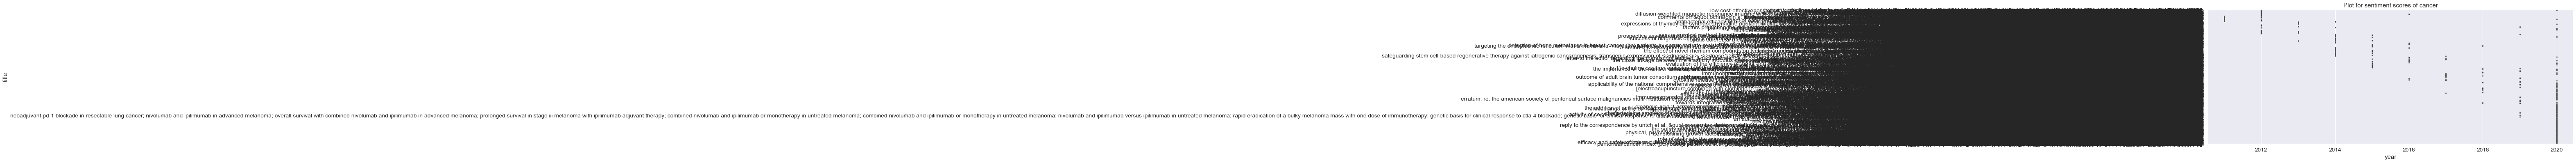

In [329]:
plt.figure(figsize=(16, 6))
ax = sns.boxplot(x="year", y="title", data=df_cancer).set_title('Plot for sentiment scores of cancer')

In [319]:
ca=ca.rename(columns = {'title':'cancer'})
ca=ca.transpose()

In [123]:
cov=cov.rename(columns = {'title':'covid'})
cov=cov.transpose()
cov

,year,2010,2011,2012,2013,2014,2016,2019,2020
covid,count,14,22,21,13,1,3,4,779


In [124]:
wear=wear.rename(columns = {'title':'wearable'})
wear=wear.transpose()
wear

,year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
wearable,count,66,188,282,256,283,445,417,291,498,455,1390


In [125]:
menheal=menheal.rename(columns = {'title':'mentalhealth'})
menheal=menheal.transpose()
menheal

,year,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
mentalhealth,count,406,425,331,311,401,295,183,273,478,2040


In [126]:
influ=influ.rename(columns = {'title':'influenza'})
influ=influ.transpose()
influ

,year,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
influenza,count,434,469,480,447,504,474,340,332,519,1433


In [127]:
data=pd.concat([ob,ca,cov,wear,menheal,influ])
data

,year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
obesity,count,NaN,392,458,406,359,471.0,451,315.0,284.0,479,1753
cancer,count,NaN,80,449,174,399,438.0,297,264.0,210.0,406,2272
covid,count,14.0,22,21,13,1,NaN,3,NaN,NaN,4,779
wearable,count,66.0,188,282,256,283,445.0,417,291.0,498.0,455,1390
mentalhealth,count,NaN,406,425,331,311,401.0,295,183.0,273.0,478,2040
influenza,count,NaN,434,469,480,447,504.0,474,340.0,332.0,519,1433


In [305]:

# Example of the Shapiro-Wilk Normality Test
from scipy.stats import shapiro
stat, p = shapiro(ob)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=0.515, p=0.000
Probably not Gaussian


In [312]:
can=[80,49,174,399,438.0,297,264.0,210.0,406,2272]

In [315]:
from scipy.stats import pearsonr
stat, p = pearsonr(can, obdata)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=0.973, p=0.000
Probably dependent


In [128]:
df_obesity['title']=df_obesity['title'].str.lower()

In [130]:
def numbers(s):
    return ''.join(c for c in s if not c.isdigit())


In [132]:

def remove_stop_words(data):
    stop_words = stopwords.words('english')
    words = word_tokenize(str(data))
    new_text = ""
    for w in words:
        if w not in stop_words and len(w) > 1:
            new_text = new_text + " " + w
    return new_text

In [137]:
def stemming(data):
    stemmer= PorterStemmer()
    
    tokens = word_tokenize(str(data))
    new_text = ""
    for w in tokens:
        new_text = new_text + " " + stemmer.stem(w)
    return new_text

In [145]:
df_obesity['cleaned']=df_obesity['title'].apply(stemming)
df_obesity['cleaned']=df_obesity['cleaned'].apply(remove_stop_words)

In [146]:
df_obesity['cleaned']

0                       tourniquet use upper limb surgeri
1          cancer mortal state mean elev select predictor
2        associ self percept psycholog well-b overweig...
3        primari care healthi choic intervent program ...
4        patient prefer linear score rule patient-repo...
                              ...                        
5368     impact bodi mass index central obes physic ac...
5369     long-term non-invas ventil patient age 75 yea...
5370     delay motor develop infant obes risk factor s...
5371     effect age inflammatori profil nutrition/ener...
5372     renal impair cardiac surgeri risk factor outc...
Name: cleaned, Length: 5373, dtype: object

In [140]:
!pip install afinn
from afinn import Afinn

In [141]:
afinn = Afinn(language='en')


In [147]:
df_obesity['afinn_score'] = df_obesity['cleaned'].apply(afinn.score)


<AxesSubplot:>

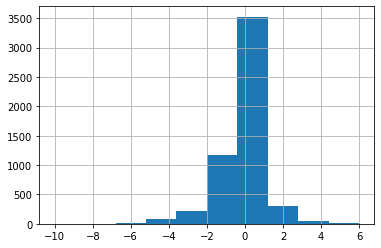

In [144]:
%matplotlib inline

ob_data['afinn_score'].hist()

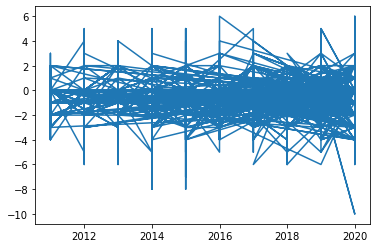

In [169]:
 plt.plot(df_obesity['year'], df_obesity['afinn_score'])

Text(0.5, 1.0, 'AFINN score for obesity keyword for 10 years')

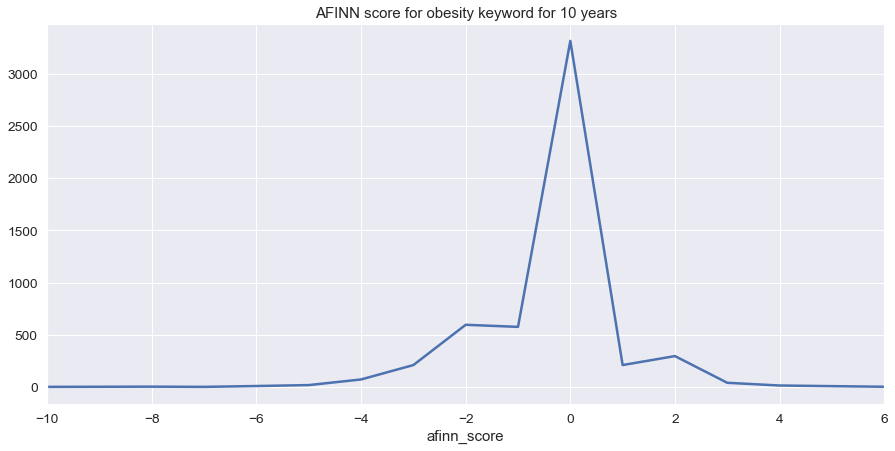

In [330]:

fig,ax=plt.subplots(figsize=(15,7))
df_obesity.groupby(['afinn_score']).count()['year'].plot(ax=ax)
plt.title("AFINN score for obesity keyword for 10 years")

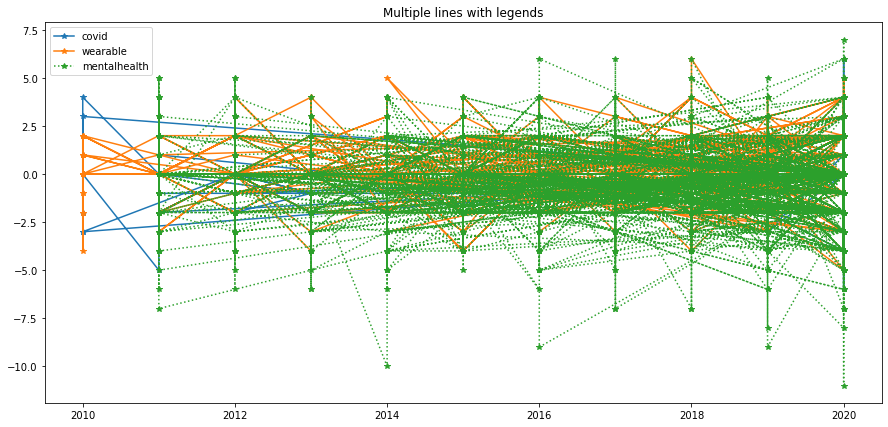

In [190]:
fig,ax3=plt.subplots(figsize=(15,7))
ax3.plot(df_covid['year'],df_covid['afinn_score'] , marker = '*', label = 'covid')
ax3.plot(df_wearable['year'],df_wearable['afinn_score'] , marker = '*' , label = 'wearable')
ax3.plot(df_menhealth['year'],df_menhealth['afinn_score'], marker = '*', linestyle = ':', label = 'mentalhealth')
ax3.set_title('Multiple lines with legends')
plt.legend()
plt.show()

In [183]:
df_cancer['title']=df_cancer['title'].str.lower()
df_cancer['cleaned']=df_cancer['title'].apply(stemming)
df_cancer['cleaned']=df_cancer['cleaned'].apply(remove_stop_words)
df_cancer['afinn_score'] = df_cancer['cleaned'].apply(afinn.score)


In [184]:
df_covid['title']=df_covid['title'].str.lower()
df_covid['cleaned']=df_covid['title'].apply(stemming)
df_covid['cleaned']=df_covid['cleaned'].apply(remove_stop_words)
df_covid['afinn_score'] = df_covid['cleaned'].apply(afinn.score)

In [185]:
df_wearable['title']=df_wearable['title'].str.lower()
df_wearable['cleaned']=df_wearable['title'].apply(stemming)
df_wearable['cleaned']=df_wearable['cleaned'].apply(remove_stop_words)
df_wearable['afinn_score'] = df_wearable['cleaned'].apply(afinn.score)

In [186]:
df_menhealth['title']=df_menhealth['title'].str.lower()
df_menhealth['cleaned']=df_menhealth['title'].apply(stemming)
df_menhealth['cleaned']=df_menhealth['cleaned'].apply(remove_stop_words)
df_menhealth['afinn_score'] = df_menhealth['cleaned'].apply(afinn.score)

In [187]:
df_influenza['title']=df_influenza['title'].str.lower()
df_influenza['cleaned']=df_influenza['title'].apply(stemming)
df_influenza['cleaned']=df_influenza['cleaned'].apply(remove_stop_words)
df_influenza['afinn_score'] = df_influenza['cleaned'].apply(afinn.score)

In [193]:
def movingaverage(interval, window_size):
    window = np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'same')

<AxesSubplot:xlabel='afinn_score'>

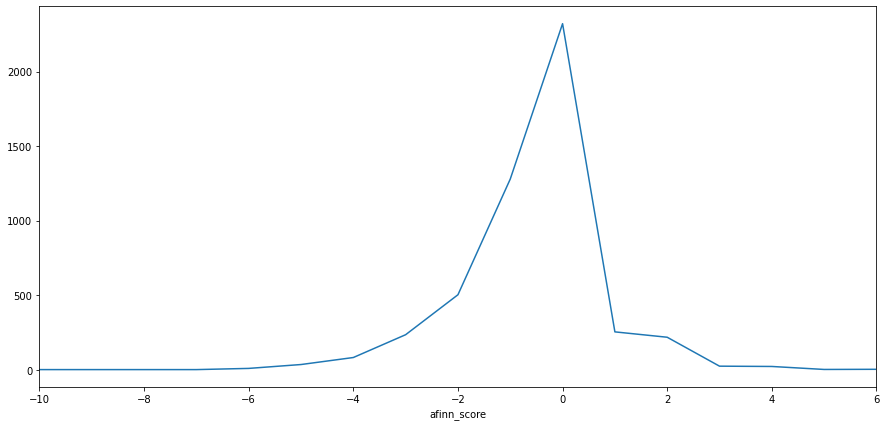

In [204]:
fig,ax=plt.subplots(figsize=(15,7))
df_cancer.groupby(['afinn_score']).count()['year'].plot(ax=ax)

<AxesSubplot:xlabel='afinn_score'>

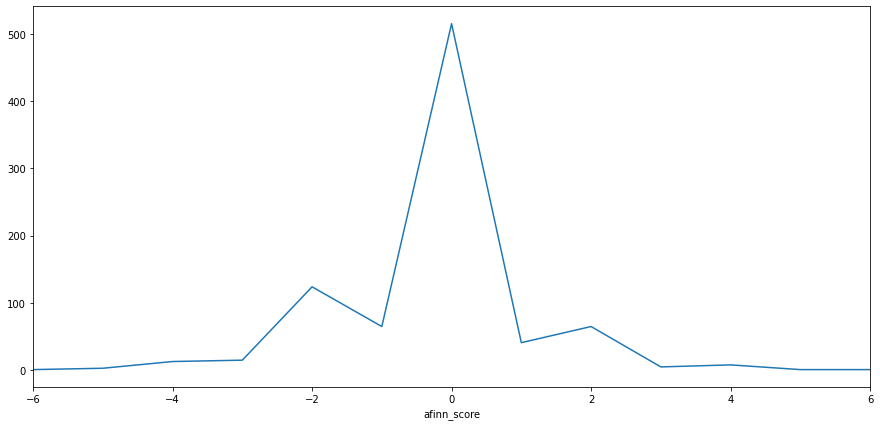

In [205]:
fig,ax=plt.subplots(figsize=(15,7))
df_covid.groupby(['afinn_score']).count()['year'].plot(ax=ax)

<AxesSubplot:xlabel='afinn_score'>

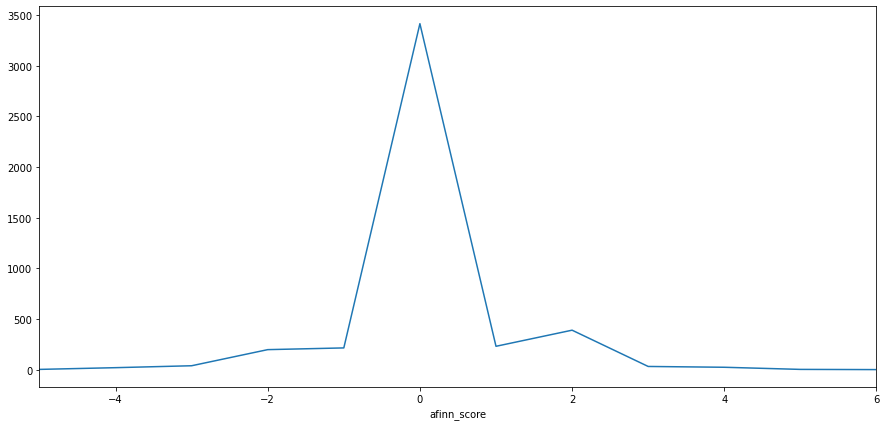

In [206]:
fig,ax=plt.subplots(figsize=(15,7))
df_wearable.groupby(['afinn_score']).count()['year'].plot(ax=ax)

<AxesSubplot:xlabel='afinn_score'>

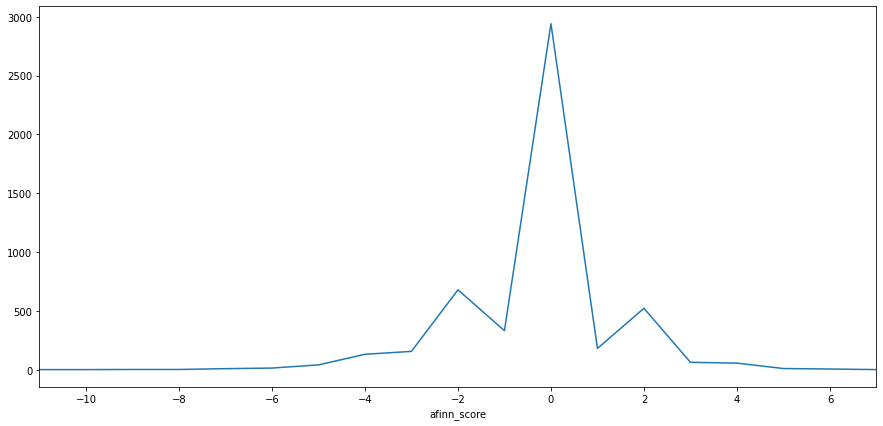

In [207]:
fig,ax=plt.subplots(figsize=(15,7))
df_menhealth.groupby(['afinn_score']).count()['year'].plot(ax=ax)

<AxesSubplot:xlabel='afinn_score'>

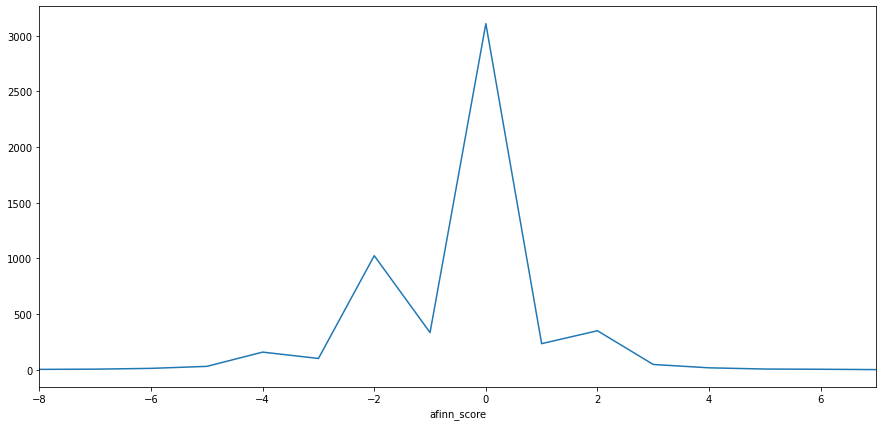

In [208]:
fig,ax=plt.subplots(figsize=(15,7))
df_influenza.groupby(['afinn_score']).count()['year'].plot(ax=ax)

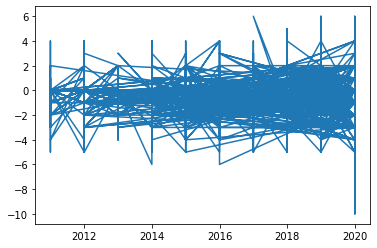

In [209]:
 plt.plot(df_cancer['year'], df_cancer['afinn_score'])

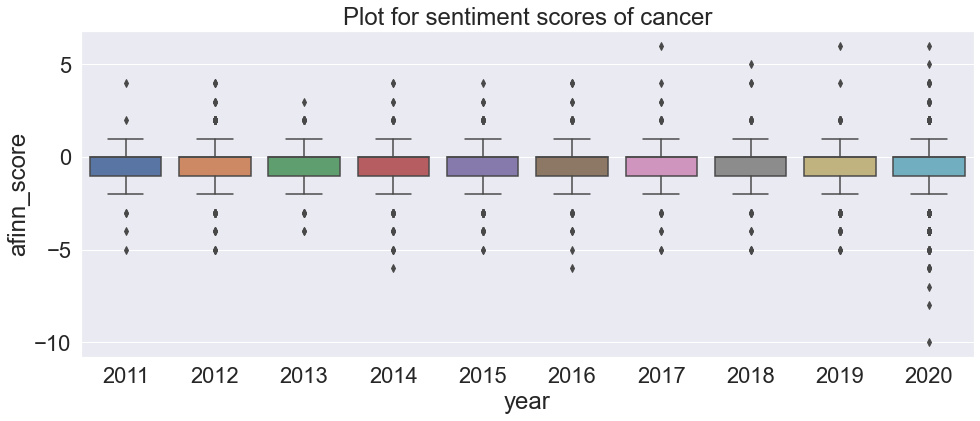

In [220]:
plt.figure(figsize=(16, 6))
ax = sns.boxplot(x="year", y="afinn_score", data=df_cancer).set_title('Plot for sentiment scores of cancer')

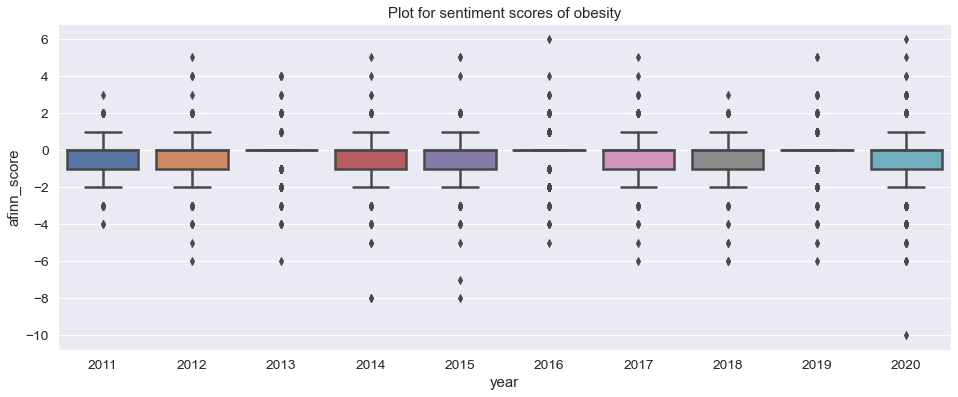

In [342]:
plt.figure(figsize=(16, 6))
ax = sns.boxplot(x="year", y="afinn_score", data=df_obesity).set_title('Plot for sentiment scores of obesity')

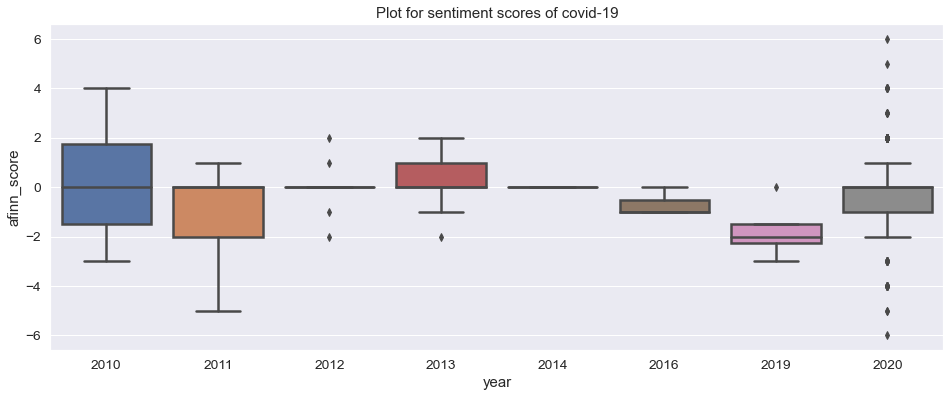

In [331]:
plt.figure(figsize=(16, 6))
ax = sns.boxplot(x="year", y="afinn_score", data=df_covid).set_title('Plot for sentiment scores of covid-19')

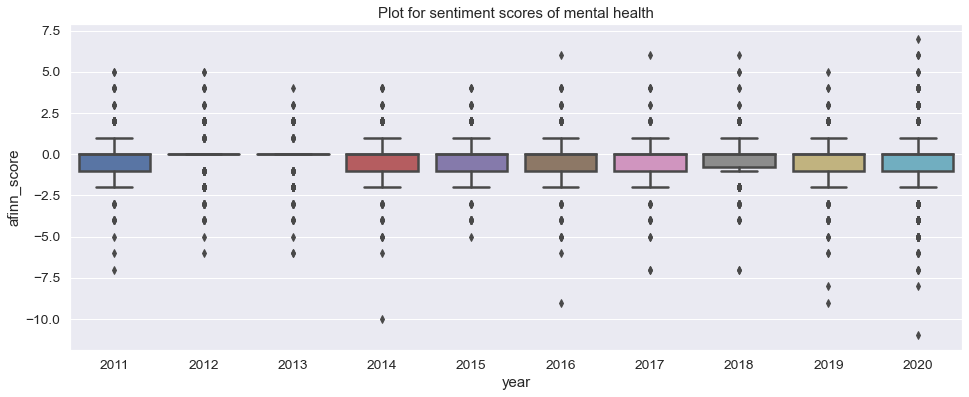

In [343]:
plt.figure(figsize=(16, 6))
ax = sns.boxplot(x="year", y="afinn_score", data=df_menhealth).set_title('Plot for sentiment scores of mental health')

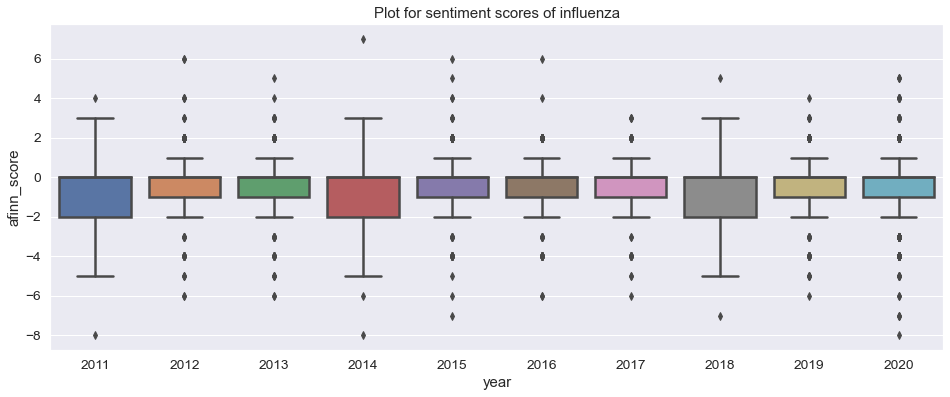

In [344]:
plt.figure(figsize=(16, 6))
ax = sns.boxplot(x="year", y="afinn_score", data=df_influenza).set_title('Plot for sentiment scores of influenza')

In [239]:
from sklearn.feature_extraction.text import CountVectorizer


In [349]:
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the processed titles
wordlist = count_vectorizer.fit_transform(df_cancer['cleaned'])

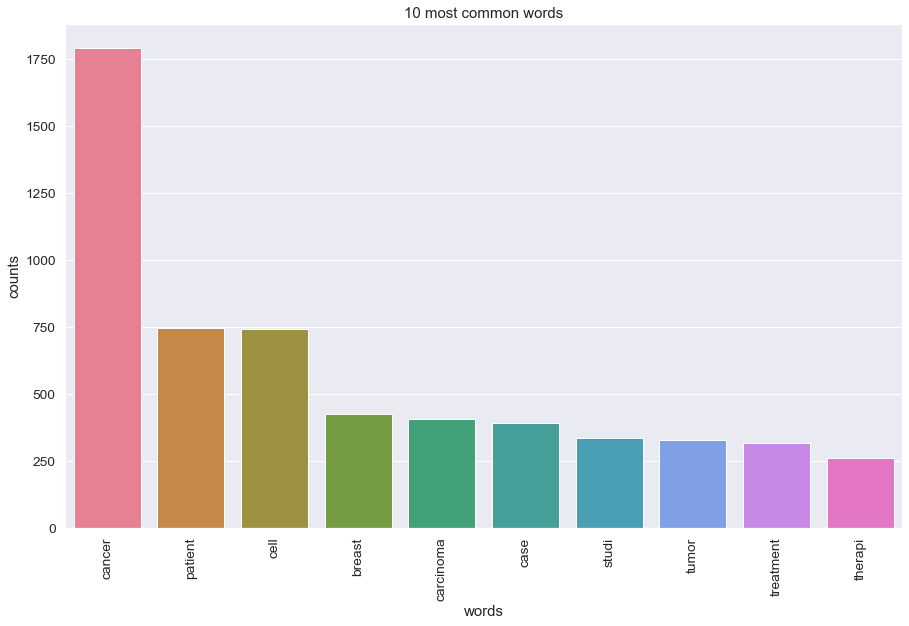

In [350]:
finding_10_highest(wordlist, count_vectorizer)

In [348]:
def finding_10_highest(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 7))
    plt.subplot(title='10 most common words')
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

In [1]:
#LDA = LDA(n_components=5, random_state=42)
#LDA.fit(count_data)

In [347]:
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(LDA, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
makino crocodil improv econom cortex deform capecitabin ficu fluorouracil eccrin

Topic #1:
makino seyedo capacit capecitabin neolith adenovirus blid dysgerminoma mendelian palmoplantar

Topic #2:
makino appli palmoplantar benc dysgerminoma pu iraqi interf proceed good

Topic #3:
makino reliev deform occidentali microvesicle alpha erythrocytosi planar cope choroid

Topic #4:
makino microvesicle provok selectin at7519 proceed 936c mous p53 iraqi


In [261]:
first_topic = LDA.components_[0]

In [262]:
top_topic_words = first_topic.argsort()[-10:]


In [264]:
for i in top_topic_words:
    print(count_vectorizer.get_feature_names()[i])

fat
high
health
children
effect
diet
fatti
liver
diseas
obes


In [265]:
for i,topic in enumerate(LDA.components_):
    print(f'Top 10 words for topic #{i}:')
    print([count_vectorizer.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')

Top 10 words for topic #0:
['fat', 'high', 'health', 'children', 'effect', 'diet', 'fatti', 'liver', 'diseas', 'obes']


Top 10 words for topic #1:
['risk', 'overweight', 'factor', 'cancer', 'age', 'prevent', 'children', 'childhood', 'year', 'obes']


Top 10 words for topic #2:
['index', 'studi', 'mass', 'metabol', 'syndrom', 'factor', 'bodi', 'risk', 'associ', 'obes']


Top 10 words for topic #3:
['control', 'diabet', 'sleev', 'gastrectomi', 'analysi', 'patient', 'random', 'effect', 'trial', 'obes']


Top 10 words for topic #4:
['metabol', 'review', 'physic', 'activ', 'studi', 'bariatr', 'weight', 'surgeri', 'patient', 'obes']


